## Oppstart

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import dhlab.nbtext as nb
import dhlab.token_map as tm
from dhlab.nbtext import get_urn, make_graph, get_urn, relaterte_ord, navn, totals
import dhlab.graph_networkx_louvain as gnl
import pandas as pd
import networkx as nx

%matplotlib inline

plot = lambda x,  lw=3, alpha= 0.7: x.plot(figsize=(15,6), lw=lw, alpha=alpha)


In [3]:
from dhlab.module_update import update, css
css()

# Hjelpekommandoer

I den her notebooken er det satt opp kode for å telle opp navn i et korpus. Både listen med navn og korpuset må foreligge som excelfiler. Noen av kommandoene vil bli lagt til `token_map`-modulen 

* `tell_navn` teller opp navnene på tvers av korpuset 
* `korpus_oppføring` finner data i korpuset
* `vis_bok` viser navn i en spesifikk bok (benytter oppførings-kommandoen)
* `aggregate_pr_col` aggregerer navnedata over kolonner.

In [4]:
import pandas as pd
from nbtext import metadata

def alle_korpusnavn(korpus):
    urner = nb.pure_urn(korpus)
    alle_navn = tm.combine_names(tm.corpus_names(urner))
    return alle_navn

def tell_navn(korpus, token_map):
    res = dict()
    for urn in nb.pure_urn(korpus['urn']):
        try:
            res[urn] = tm.count_name_strings(str(urn), token_map)
            res[urn].columns = [str(urn)]
        except:
            print("Problemer med å telle fra: ", urn)
    return pd.concat([res[u] for u in res], axis=1)

def korpus_oppføring(df, text, column='tittel'):
    return nb.pure_urn(df[df[column].str.contains(text)]['urn'])

def add_metadata(korpus, how='inner'):
    f = nb.frame([(z[0], '_'.join([str(x) for x in z[2:4]])) for z in nb.metadata(korpus['urn'])], 'urn metadata'.split())
    f = f.astype({'urn':'str'})
    return korpus.merge(f, on = 'urn', how = how)
    
vis_bok = lambda x, column = 'tittel': nb.frame_sort(nb.frame(opptelling[korpus_oppføring(korpus, x, column)[0]].dropna(), nb.metadata(korpus_oppføring(korpus, x, column)[0])[0][3]))

    

def bygg_allgraf(korpus):
    graphs = dict()
    for u in korpus.urn:
        graphs[u] = tm.character_network(u, redigerte_navn)
    df_graphs = [nx.to_pandas_adjacency(graphs[x]) for x in graphs]
    g = df_graphs[0]
    for z in df_graphs[1:]:
        g = g.add(z, fill_value=0).fillna(0)

    total_graph = nx.from_pandas_adjacency(g)
    return total_graph

## Navn i bøker


Vi søker etter navn i en bok, og en serie av bøker.

Kommandoene er:
1. `names` henter et sett med forslag til navn, fra nbtext
1. `show_names` gir en oversikt over funnene, fra token_map
1. `names_to_token_map_file` lagrer navneforslagene til en excelfil (eller csv) for redigering (token_map)
1. `read_token_map_file` henter redigert fil tilbake for analyse (token_map)
1. `character_network` lager graf for navnene (token_map)
1. `show_graph`  tegner grafen (fra graph_networkx_louvain)
1. `show_communities` viser clustre i grafen (graph_networkx_louvain)



## Korpus

Hent korpus fra excelfil. Det er korpuset det skal telles opp fra. Korpuset som genererer navn kan godt være forskjellig fra der det telles.

In [5]:
korpus = nb.restore_metadata_from_excel('c:/users/larsj/downloads/Hamsunkorpus, kronologisk_ed.xls')
korpus

,urn,forf,år,tittel,undertittel,forlag,sjanger,sesamid,språk,oversatt
0,2008112113001,"Hamsun, Knut",1877,Den Gaadefulde,en Kjærlighedshistorie fra Nordland,Urdal,unknown,05b5fb8e2ffab70be305373f9857ee85,nob,NaN
1,2009061013011,"Hamsun, Knut",1878,Bjørger,fortælling,[K. Hamsund];Alb.Fr. Knudsen,unknown,709614fcb48740925154af4130d7a26c,nob,NaN
2,2009061013012,"Hamsun, Knut",1878,Et gjensyn,NaN,[s.n.];Alb. Fr. Knudsen,unknown,233ad96c3f3bedf1739ceb29a81534d4,nob,NaN
3,2009061012004,"Hamsun, Knut",1889,Fra det moderne Amerikas Aandsliv,NaN,Philipsen,unknown,949c8474bef0068c4d97f02c2f646284,nob,NaN
4,2009042313001,"Hamsun, Knut",1889,Lars Oftedal,Udkast,Litleré,unknown,9b6cc05c90fa5a5ccc27f018e2c27281,nob,NaN
5,2015051929001,"Hamsun, Knut",1890,Sult,NaN,Philipsen,novel,b4a0a4c7765fa29eb4a1ba910405806e,nob,NaN
6,2008123012002,"Hamsun, Knut",1892,Mysterier,Roman,Philipsen,unknown,9f41e621267dd5475db9b7e45cd00367,nob,NaN
7,2008123012003,"Hamsun, Knut",1893,Redaktør Lynge,Roman,Philipsen,fiction,e09ea1ee062affda9ab9fdfde810517c,nob,NaN
8,2008123010002,"Hamsun, Knut",1893,Ny Jord,Roman,Philipsen,unknown,aca8b7840508f729920970a51fea6c05,nob,NaN
9,2008082710002,"Hamsun, Knut",1894,Pan,af Løjtnant Thomas Glahns Papirer,Philipsen,unknown,8dab706553bacde19fa1a30c06896464,nob,NaN


## Sjekk innholdet

Gjør noen søk for å se at alt er ok. Konkordanser er fine til det. 

In [6]:
nb.urn_concordance(word = 'Benoni', urns = korpus) 

"Rosa, Hamsun, Knut, 1908",leved ogsaa den gode Mand,Benoni,Hartvig-
"Rosa, Hamsun, Knut, 1908",Middagstiden gik jeg derimod til,Benoni,Hartvigsens Hus og fremstilled mig
"Rosa, Hamsun, Knut, 1908",det Dem som er hos,Benoni,Hart vigsen ? spurte han
"Rosa, Hamsun, Knut, 1908",", det var nu han",Benoni,og jeg som betalte ham
"Rosa, Hamsun, Knut, 1908","mit hele Navn , for",Benoni,det er jeg døbt i
"Benoni, Hamsun, Knut, 1908",foruden dette er det bare,Benoni,som har sin Gang her
"Benoni, Hamsun, Knut, 1908",Sommer og Vinter . Og,Benoni,gaar i tørt Vejr og
"Benoni, Hamsun, Knut, 1908",None,Benoni,han er Fisker som alle
"Benoni, Hamsun, Knut, 1908","hvert Kvartal, og derfor er",Benoni,en Støver og en Brand
"Benoni, Hamsun, Knut, 1908",af Rigdom paa Vejene .,Benoni,derimod kom uforanderlig Aar efter
"Vandrer spiller med Sordin, Hamsun, Knut, 1909",None,Benoni,", Roman 1908 5.50"


### Hent redigert fil

Husk at verdien på orient må være lik mellom lagring og lesing av excelfil. Typisk for den her type redigering er radorientering. Excel har en begrensning på 256 kolonner, som blir for smått for de fleste anvendelser. Det er tilnærmet ubegrenset kapasitet på antall rader.

In [7]:
redigerte_navn = tm.read_token_map_file("c:/users/larsj/downloads/ner-samledeverker.xls", orient = "row")

In [9]:
[x[0][0] for x in redigerte_navn]

['Rådstuen',
 'Rosengård',
 'Bergen',
 'Bergens',
 'Hopan',
 'Jerusalem',
 'Lofoten',
 'Sirilund',
 'Sirilunds',
 'Torpelviken',
 'Doppen',
 'Doppens',
 'Norge',
 'Norges',
 'Fra',
 'Stordalen',
 'Sveits',
 'Toretind',
 'Toretindene',
 'Toretindene',
 'Berlin',
 'England',
 'Englands',
 'New',
 'Hannover',
 'Harrow',
 'Mexico',
 'Moritz',
 'Trondhjem',
 'Amerika',
 'Amerikas',
 'Sagvika',
 'Ura',
 'Utvær',
 'Vælta',
 'Breidablik',
 'Maaneland',
 'Marken',
 'Markens',
 'Sellanraa',
 'Sellanrå',
 'Sellanraas',
 'Storborg',
 'Sverige',
 'Segelfoss',
 'Heia',
 'Stortinget',
 'Stortingets',
 'Vangen',
 'Nuten',
 'Torahus',
 'Bodø',
 'Bodøs',
 'Fosenlandet',
 'Fosen',
 'Levanger',
 'Polden',
 'Poldens',
 'Ytrepolden',
 'Fuglværø',
 'Indrebygden',
 'Lund',
 'Nordgrenden',
 'Segelfossen',
 'Sørgrenden',
 'Canada',
 'Kentucky',
 'Natal',
 'Aabakken',
 'Bjørger',
 'Bjørger',
 'Drammen',
 'Gaden',
 'Sinvåra',
 'Bjærget',
 'Hav',
 'Himlen',
 'Jorden',
 'Jær',
 'Land',
 'Norges',
 'Myren',
 'Fra',


## Tell opp navn med hensyn til det som står i `redigerte_navn`

Bruker hjelpekommando `tell_navn`. Det kan ta litt tid å telle opp, et par minutter.

In [8]:
opptelling = tell_navn(korpus, redigerte_navn)

Sånn ser opptellingen ut, en kolonne pr. bok. 

In [9]:
opptelling.head()

,2008112113001,2009061013011,2009061013012,2009061012004,2009042313001,2015051929001,2008123012002,2008123012003,2008123010002,2008082710002,...,2009051413002,2014021807090,2014120206051,2008091603021,2008091603020,2009061010002,2009061013010,2014080408001,2012041208040,2008042201022
Aabakken,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Amerika,NaN,NaN,NaN,305.0,4.0,NaN,2.0,9.0,5.0,NaN,...,NaN,2.0,49.0,69.0,47.0,1.0,NaN,3.0,10.0,7.0
Amerikas_Vesten,1.0,NaN,NaN,3.0,1.0,4.0,5.0,NaN,1.0,NaN,...,1.0,2.0,2.0,6.0,NaN,NaN,2.0,1.0,1.0,1.0
Baku,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bergen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2.0,27.0,NaN,3.0,NaN,NaN,NaN,1.0


Opptelling totalt for korpuset, summering over alle bøkene.

In [10]:
nb.frame_sort(nb.frame(opptelling.sum(axis=1)))

,0
Verden,838.0
Skogen,718.0
Jorden,598.0
Amerika,579.0
Norges_Land,561.0
Polden,523.0
Segelfoss,401.0
Marken,384.0
Gaden,335.0
Jær,276.0


## Kommando `vis_bok`

Bruk kommandoen å finne data om en bok. Skriv en tittelen, eller deler av den. 

In [11]:
vis_bok('Benoni')

,Benoni
Sirilund,119.0
Lofoten,30.0
Torpelviken,20.0
Bergen,19.0
Skogen,16.0
Hopan,14.0
Verden,12.0
Jorden,6.0
Norges_Land,6.0
Himlen,5.0


# Lag en graf for en enkelt bok

Grafene kan legges sammen i etterkant om det ønskes en graf for hele korpuset.

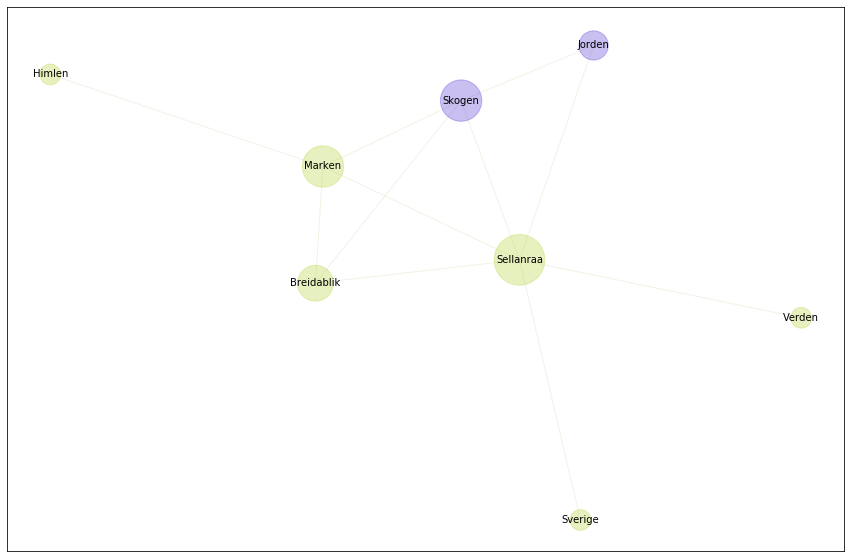

In [12]:
# fyll inn et navn fra ovenstående. Flere grafer kan slås sammen i ettertid. Bare lag så mange du orker 

G = tm.character_network(korpus_oppføring(korpus, 'Marken'), redigerte_navn)
gnl.show_graph(G)

# Bygger grafer for alle bøkene

Benytt hjelpekommandoen `bygg_allgraf` for å samle grafene i en stor total graf.

In [13]:
korpusgraf = bygg_allgraf(korpus)

Visualiser og analyser på vanlig måte.

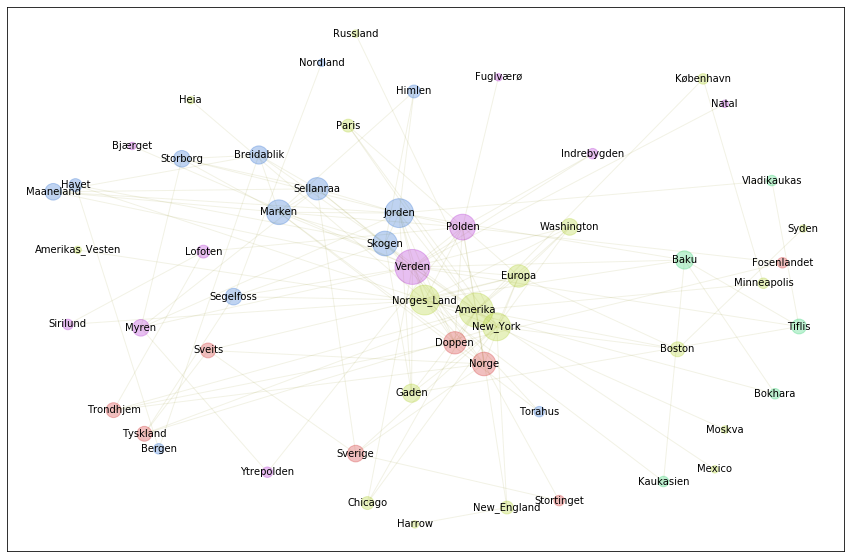

In [14]:
gnl.show_graph(korpusgraf, spread=1.8)

Forslag til clustre basert på grafen. Clusteralgoritmen for Louvain kan synes å være litt random, så resultatene kan varierere mellom kjøringer. Men det ser skapelig ut, og gir mening.

In [15]:
gnl.show_communities(korpusgraf)

Amerika-Norges_Land :  Amerika, Norges_Land, New_York, Europa, Gaden, Washington, Boston, Paris, Chicago, New_England, Minneapolis, København, Amerikas_Vesten, Heia, Russland, Harrow, Mexico, Moskva, Syden

Baku-Tiflis :  Baku, Tiflis, Bokhara, Kaukasien, Vladikaukas

Jorden-Marken :  Jorden, Marken, Skogen, Sellanraa, Breidablik, Maaneland, Storborg, Segelfoss, Himlen, Havet, Bergen, Torahus, Nordland

Verden-Polden :  Verden, Polden, Myren, Lofoten, Ytrepolden, Sirilund, Indrebygden, Natal, Bjærget, Fuglværø

Norge-Doppen :  Norge, Doppen, Sverige, Sveits, Trondhjem, Tyskland, Stortinget, Fosenlandet

